In [1]:
import torch
import torch.nn.functional as F
import random

def get_gaussian_kernel(kernel_size: int, sigma: float):
    """Generate a 2D Gaussian kernel."""
    ax = torch.arange(kernel_size).float() - kernel_size // 2
    xx, yy = torch.meshgrid(ax, ax, indexing='ij')
    kernel = torch.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()
    return kernel

def apply_gaussian_blur(img_tensor, kernel_size=129, sigma=64.0):
    """Apply Gaussian blur to an image tensor (1, C, H, W)."""
    kernel = get_gaussian_kernel(kernel_size, sigma).to(img_tensor.device)
    kernel = kernel.view(1, 1, kernel_size, kernel_size)
    kernel = kernel.expand(img_tensor.size(1), 1, kernel_size, kernel_size)
    return F.conv2d(img_tensor, kernel, padding=kernel_size // 2, groups=img_tensor.size(1))

def defocus_blur(img_tensor, radius=64, p=0.2):
    """
    Apply defocus blur with given radius and probability.
    - img_tensor: (1, 3, H, W) torch.Tensor in [0,1]
    """
    # if random.random() < p:
    kernel_size = radius * 2 + 1
    sigma = radius
    return apply_gaussian_blur(img_tensor, kernel_size=kernel_size, sigma=sigma)
    # else: 
        # return img_tensor  # No-op


In [5]:
# Load image manually if not using torchvision
from PIL import Image
import numpy as np

image = Image.open("./sample/image_000019.jpg").convert("RGB")
image_np = np.array(image).astype(np.float32) / 255.0
img_tensor = torch.from_numpy(image_np).permute(2, 0, 1).unsqueeze(0)

# Apply defocus blur with Albumentations-style settings
blurred_tensor = defocus_blur(img_tensor, radius=64, p=0.4)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_tensor_image(tensor, title=""):
    """
    Visualize a torch tensor of shape (1, 3, H, W) or (3, H, W).
    """
    if tensor.dim() == 4:
        tensor = tensor.squeeze(0)  # Remove batch dim
    img = tensor.permute(1, 2, 0).clamp(0, 1).detach().cpu().numpy()  # (H, W, 3)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()


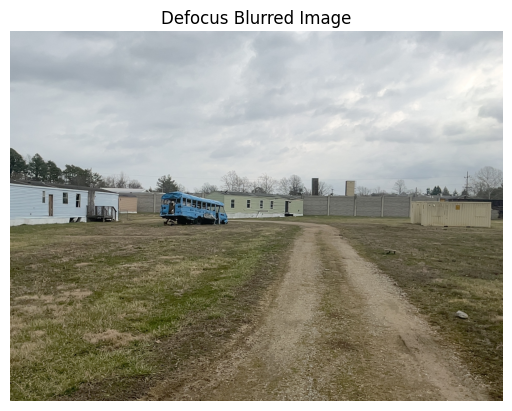

In [ ]:
show_tensor_image(blurred_tensor, title="Defocus Blurred Image")